In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from tqdm.notebook import tqdm
from scipy.signal import correlate
import os
import scipy as sp
import scipy.optimize

from isingpackage import*

%matplotlib inline

  0%|          | 0/801 [00:00<?, ?it/s]

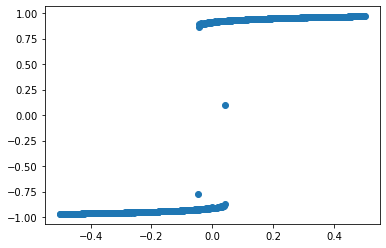

In [44]:
#This cell is for tuning and trying out different parameters

N=64
T=2

#Number of segments that we're cutting the whole H sweeping range into
H_points = 401

#Sweeping muH from -muH_max to muH_max
muH_max = 0.5

#Numbers of frames to wait for the system to reach equilibrium
eq_wait = 500
#Number of frames to average over for the measurement of M
measurements = 500



forward = np.linspace(-muH_max, muH_max, H_points)
backward = np.linspace(muH_max, -muH_max, H_points)[1:]
muHs = np.concatenate((forward, backward), axis=0)

#measurements
Ms = []

array = spin_array(N=N, randomseed = 123)

for muH in tqdm(muHs):

    M_list = []

    for i in range(eq_wait):
        array.update_array(T=T, muH=muH)


    for i in range(measurements):
        array.update_array(T=T, muH=muH)
        M_list.append(array.get_M_mean())
    
    Ms.append(np.mean(M_list))



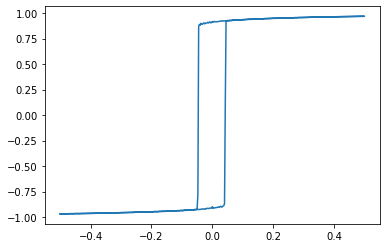

In [45]:
plt.plot(muHs, Ms)

In [50]:
#This cell carry out the measurements and save it in a csv file

N=64

H_points = 401
muH_max = 1

eq_wait = 500
measurements = 500

#Temperature that we're sweeping through and the increment
T_min, T_max, T_step = 1.3, 2.4, 0.05

Ts = np.linspace(T_min, T_max , round((T_max -T_min)/T_step + 1))

forward = np.linspace(-muH_max, muH_max, H_points)
backward = np.linspace(muH_max, -muH_max, H_points)[1:]
muHs = np.concatenate((forward, backward), axis=0)
Ms = []

#string that stores the content which we're writing to the csv
string = ''

#first row is the muH points
for muH in muHs:
    
    string += ('{},'.format(muH))

string = string[:-1] + '\n'

#
for T in tqdm(Ts):

    array = spin_array(N=N, randomseed = int(T*100))
    print('T={}'.format(T))

    for muH in tqdm(muHs):

        current_measurements = []

        for i in range(eq_wait):
            array.update_array(T=T, muH=muH)


        for i in range(measurements):
            array.update_array(T=T, muH=muH)
            current_measurements.append(array.get_M_mean())
        
        string += '{},'.format(np.mean(current_measurements))
    
    string = string[:-1] + '\n'

    with open('measurements\\Hysteresis.csv', 'w') as f:
        f.write(string)

[1.3  1.35 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95
 2.   2.05 2.1  2.15 2.2  2.25 2.3  2.35 2.4 ]


  0%|          | 0/23 [00:00<?, ?it/s]

T=1.3


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.35


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.4000000000000001


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.45


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.5


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.55


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.6


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.65


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.7


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.75


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.8


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.85


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.9


  0%|          | 0/801 [00:00<?, ?it/s]

T=1.95


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.0


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.05


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.1


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.15


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.2


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.25


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.3


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.3499999999999996


  0%|          | 0/801 [00:00<?, ?it/s]

T=2.4


  0%|          | 0/801 [00:00<?, ?it/s]